<a href="https://colab.research.google.com/github/MateoMarco/CLAIO2022/blob/main/CLAIO_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Instalo las librerias para la tokenizacion, lematizacion, etc.

In [ ]:
!pip install textacy

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import textacy.preprocessing as tprep

In [103]:
!gdown --id 1CV5VooCpM5tQSHTMyS_b1yKKxwVFpzvk

df = pd.read_csv("IO Respuestas.csv", sep=',')
df

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CV5VooCpM5tQSHTMyS_b1yKKxwVFpzvk
To: /content/IO Respuestas.csv
100% 17.4k/17.4k [00:00<00:00, 10.1MB/s]


,Marca temporal,Dirección de correo electrónico,Padrón sin números,¿qué es la Investigación Operativa?
0,30/03/2022 17:49:38,pcortif@fi.uba.ar,100723,Se basa en la utilización de métodos analític...
1,30/03/2022 18:00:36,mcirolini@fi.uba.ar,97739,"Optimización y diseño de operaciones, control ..."
2,30/03/2022 18:30:40,rparedes@fi.uba.ar,97920,Aplicaciones de métodos operativos a la vida real
3,30/03/2022 19:20:14,mledesma@fi.uba.ar,102908,La optimización de las operaciones mediante el...
4,30/03/2022 19:20:32,tandrada@fi.uba.ar,100586,Una forma interdisciplinaria de resolver probl...
...,...,...,...,...
116,30/03/2022 21:52:35,jrenovales@fi.uba.ar,103787,Es el area que se encarga de aplicar distintos...
117,30/03/2022 23:07:20,jovillamil@fi.uba.ar,99825,NaN
118,31/03/2022 12:00:41,npesaresi@fi.uba.ar,104911,Aplicación de la ciencia moderna a problemas c...
119,1/04/2022 17:30:14,mjung@fi.uba.ar,102939,No pude completar la encuesta con el celular e...


Creo un nuevo df con los padrones y las respuestas

In [104]:
df2 = df[['Padrón sin números', '¿qué es la Investigación Operativa?']]
df2.columns = ['Padron','Respuesta']

En caso de ser necesario:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

Primero tokenizo, luego elimino stop words, y por ultimo lematizo (obtengo las raices).

In [108]:
for i in range (len(df2)):
  df2["Respuesta"][i] = word_tokenize(str(df2["Respuesta"][i]).lower())
  df2["Respuesta"][i] = [word for word in df2["Respuesta"][i] if word not in stopwords.words('spanish')]
  stemmer = SnowballStemmer('spanish')
  df2["Respuesta"][i] = [stemmer.stem(j) for j in df2["Respuesta"][i]]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Padron,Respuesta
0,100723,"[bas, utiliz, metod, analit, ayud, tom, mejor,..."
1,97739,"[optimiz, diseñ, oper, ,, control, proces, ind..."
2,97920,"[aplic, metod, oper, vid, real]"
3,102908,"[optimiz, oper, mediant, uso, program]"
4,100586,"[form, interdisciplinari, resolv, problem, mul..."
...,...,...
116,103787,"[are, encarg, aplic, distint, metod, oper, ayu..."
117,99825,[nan]
118,104911,"[aplic, cienci, modern, problem, complej, apar..."
119,102939,"[pud, complet, encuest, celul, dia, clas, ., d..."


A partir de las palabras que consideramos clave, vamos a corregir los ejercicios. Tambien se podría cargar directamente la definición completa, y realizar el mismo proceso previo de stemming para obtener dichas palabras.

In [109]:
answer = ['método','decisiones','problema', 'optimizar', 'modelo','analítico','matemático','estadística','soluciones']

Nos quedamos únicamente con las raíces.

In [110]:
answer = [stemmer.stem(j) for j in answer]
answer

['metod',
 'decision',
 'problem',
 'optimiz',
 'model',
 'analit',
 'matemat',
 'estadist',
 'solucion']

Creamos el score individual

In [111]:
from collections import Counter

In [ ]:
df2['Score'] = 0
df2

Obtenemos la cantidad de coincidencias entre el patrón y la respuesta.

In [ ]:
for i in range (len(df2)):
  df2['Score'][i] = list((Counter(answer) & Counter(df2['Respuesta'][i])).elements())
  df2['Score'][i] = len(df2['Score'][i])
df2

Asignamos las respuestas al df inicial de acuerdo a una corrección por curva:

In [ ]:
for i in range (len(df2)):
  if df2['Score'][i] < df2['Score'].quantile(0.6):
    df['Grade'][i] = 0
  elif df2['Score'][i] >= df2['Score'].quantile(0.6) and df2['Score'][i] <= df2['Score'].quantile(0.8):
    df['Grade'][i] = 1
  elif df2['Score'][i] > df2['Score'].quantile(0.8):
    df['Grade'][i] = 2
  
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Marca temporal,Dirección de correo electrónico,Padrón sin números,¿qué es la Investigación Operativa?,Grade
0,30/03/2022 17:49:38,pcortif@fi.uba.ar,100723,Se basa en la utilización de métodos analític...,2
1,30/03/2022 18:00:36,mcirolini@fi.uba.ar,97739,"Optimización y diseño de operaciones, control ...",1
2,30/03/2022 18:30:40,rparedes@fi.uba.ar,97920,Aplicaciones de métodos operativos a la vida real,1
3,30/03/2022 19:20:14,mledesma@fi.uba.ar,102908,La optimización de las operaciones mediante el...,1
4,30/03/2022 19:20:32,tandrada@fi.uba.ar,100586,Una forma interdisciplinaria de resolver probl...,1
...,...,...,...,...,...
116,30/03/2022 21:52:35,jrenovales@fi.uba.ar,103787,Es el area que se encarga de aplicar distintos...,1
117,30/03/2022 23:07:20,jovillamil@fi.uba.ar,99825,NaN,0
118,31/03/2022 12:00:41,npesaresi@fi.uba.ar,104911,Aplicación de la ciencia moderna a problemas c...,1
119,1/04/2022 17:30:14,mjung@fi.uba.ar,102939,No pude completar la encuesta con el celular e...,0


Para visualizar gráficamente los resultados:

Text(0, 0.5, 'Cantidas de palabras acertadas')

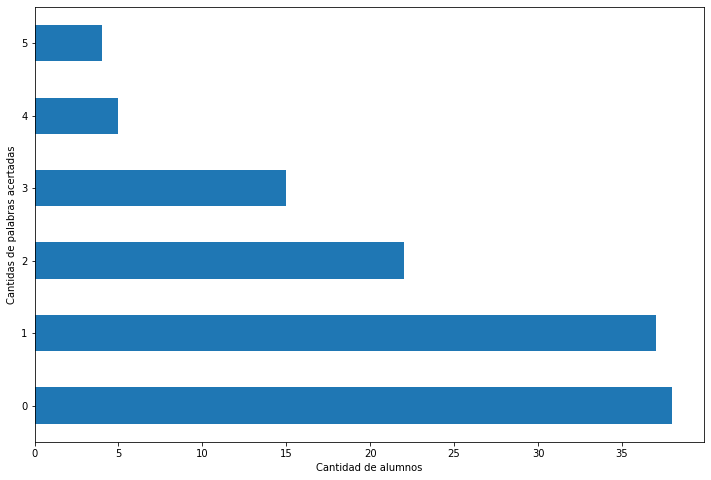

In [ ]:
fig,axis = plt.subplots( nrows=1 , ncols=1 , figsize=(12,8) )
df2['Score'].value_counts(ascending=True).plot(kind='barh',ax=axis)
axis.invert_yaxis()
axis.set_xlabel("Cantidad de alumnos")
axis.set_ylabel("Cantidas de palabras acertadas")

Text(0, 0.5, 'Nota')

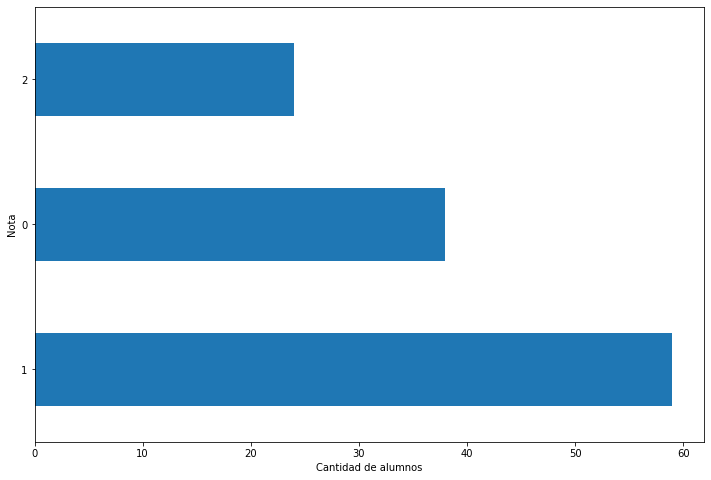

In [ ]:
fig,axis = plt.subplots( nrows=1 , ncols=1 , figsize=(12,8) )
df['Grade'].value_counts(ascending=True).plot(kind='barh',ax=axis)
axis.invert_yaxis()
axis.set_xlabel("Cantidad de alumnos")
axis.set_ylabel("Nota")

Algunos otros datos a tener en cuenta:

In [114]:
avg_score = df2['Score'].mean()
avg_score

1.371900826446281

In [115]:
max_score = df2['Score'].max()
max_score

5

In [117]:
median_score = df2['Score'].median()
median_score

1.0

In [143]:
np.percentile(df2['Score'], np.arange(0, 100, 5))

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0], dtype=object)